In [1]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns 
import pandas as pd

In [2]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema"
emph_non_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_non_harm_exptoinsp_files = sorted(os.listdir(emph_non_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone_unharmonized = []

def dice_overlap(seg1, seg2):
   seg1 = seg1.astype(bool)
   seg2 = seg2.astype(bool)
   intersection = np.sum(seg1 & seg2)
   union = np.sum(seg1) + np.sum(seg2)
    
   return 2 * intersection / union

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    non_harm_exptoinsp = nib.load(os.path.join(emph_non_harm_exptoinsp, emph_non_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, non_harm_exptoinsp)

    dice_overlap_bone_unharmonized.append(bone_dice)

 26%|██▌       | 13/50 [00:46<02:08,  3.47s/it]

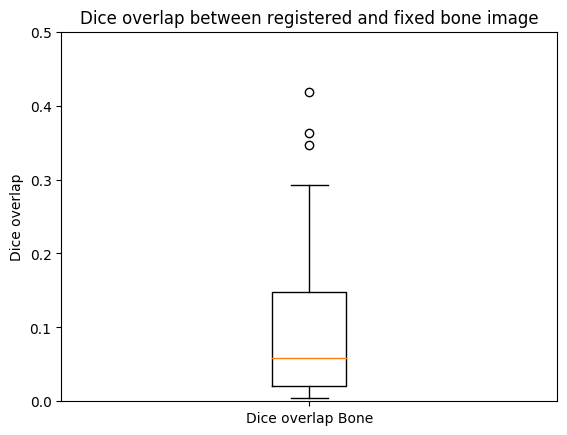

In [ ]:
#Plot the dice overlap between registered and bone and registered and standard as boxplots 
plt.figure()
plt.boxplot([dice_overlap_bone_unharmonized])
plt.xticks([1], ['Dice overlap Bone'])
plt.ylabel("Dice overlap")
plt.ylim(0, 0.5)
plt.title("Dice overlap between registered and fixed bone image")
plt.show()


In [ ]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_harm_exptoinsp_files = sorted(os.listdir(emph_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone = []

def dice_overlap(seg1, seg2):
   seg1 = seg1.astype(bool)
   seg2 = seg2.astype(bool)
   intersection = np.sum(seg1 & seg2)
   union = np.sum(seg1) + np.sum(seg2)
    
   return 2 * intersection / union

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    harm_exptoinsp = nib.load(os.path.join(emph_harm_exptoinsp, emph_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, harm_exptoinsp)

    dice_overlap_bone.append(bone_dice)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [02:54<00:00,  3.46s/it]


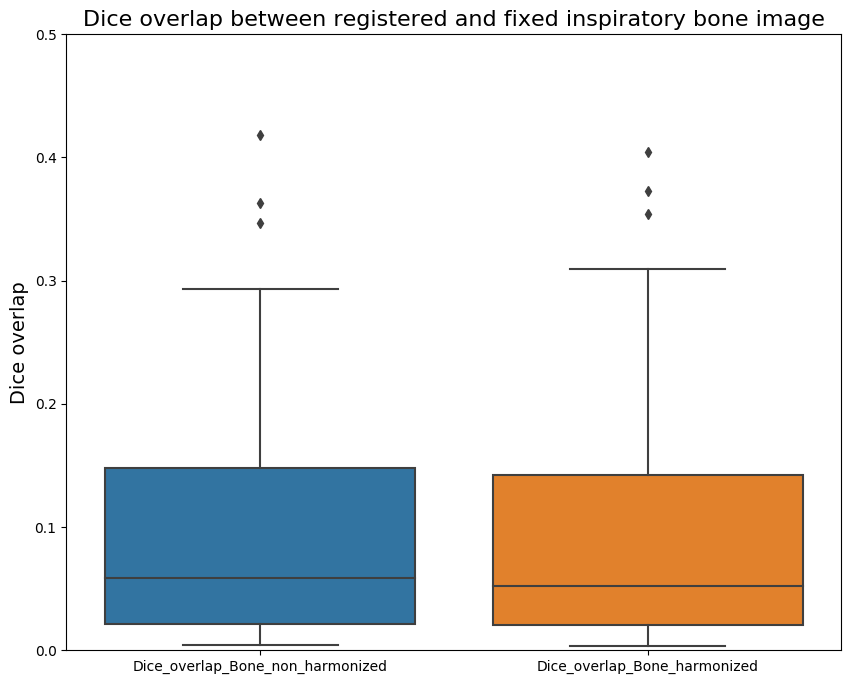

In [ ]:
data = {
    'Dice_overlap_Bone_non_harmonized': dice_overlap_bone_unharmonized,
    'Dice_overlap_Bone_harmonized': dice_overlap_bone
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.ylabel("Dice overlap", fontsize=14)
plt.ylim(0, 0.5)
plt.title("Dice overlap between registered and fixed inspiratory bone image", fontsize=16)
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/dice_overlap.tiff", dpi=300)
plt.show()

In [ ]:
# Compute range of standard deviation of dice overlap between registered and bone and registered and standard
mean_bone = np.mean(dice_overlap_bone)
mean_bone_unharmonized = np.mean(dice_overlap_bone_unharmonized)
std_dev_bone = np.std(dice_overlap_bone)
std_dev_bone_unharmonized = np.std(dice_overlap_bone_unharmonized)
print(f"Mean dice overlap between registered and bone: {mean_bone:.3f}")
print(f"Mean dice overlap between registered and standard: {mean_bone_unharmonized:.3f}")
print(f"Standard deviation of dice overlap between registered and bone: {std_dev_bone:.3f}")
print(f"Standard deviation of dice overlap between registered and standard: {std_dev_bone_unharmonized:.3f}")

Mean dice overlap between registered and bone: 0.102
Mean dice overlap between registered and standard: 0.116
Standard deviation of dice overlap between registered and bone: 0.109
Standard deviation of dice overlap between registered and standard: 0.123


In [ ]:
import scipy.stats as stats

#Paired t test 
pval, tstat = stats.ttest_rel(dice_overlap_bone, dice_overlap_bone_unharmonized)
print(pval, stat)

pval_wi, tstat_wi = stats.wilcoxon(dice_overlap_bone, dice_overlap_bone_unharmonized)
print(pval_wi, tstat_wi)